# Both C11 camps

In [9]:
%matplotlib notebook
import ipympl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from astropy.io import fits
from glob import glob
import lightkurve as lk

from astropy.wcs import WCS

In [10]:
def pix2coord(x,y,mywcs):
    wx, wy = mywcs.wcs_pix2world(x, y, 0)
    return np.array([float(wx), float(wy)])

In [6]:
c11_1 = '/Users/ryanr/Documents/PhD/coding/Kepler/Data/ktwo203830112-c111_lpd-targ.fits.gz'
c11_2 = '/Users/ryanr/Documents/PhD/coding/Kepler/Data/ktwo203830112-c112_lpd-targ.fits.gz'

tpf1 = lk.KeplerTargetPixelFile(c11_1)
tpf2 = lk.KeplerTargetPixelFile(c11_2)

In [57]:
ra = 253.461 
dec = -24.775
ra_1 = tpf1.get_coordinates(cadence=0)[0]
dec_1 = tpf1.get_coordinates(cadence=0)[1]

dist_1 = np.sqrt((ra_1-ra)**2 + (dec_1-dec)**2)
ev_1 = np.where(dist_1 == np.nanmin(dist_1))
print(np.nanmin(dist_1))

ra_2 = tpf2.get_coordinates(cadence=0)[0]
dec_2 = tpf2.get_coordinates(cadence=0)[1]

dist_2 = np.sqrt((ra_2-ra)**2 + (dec_2-dec)**2)
ev_2 = np.where(dist_2 == np.nanmin(dist_2))

0.00046854878418795714


In [52]:
ev_1[0]

array([12])

In [54]:
np.where(dist_2 == np.nanmin(dist_2))

(array([10]), array([8]))

<IPython.core.display.Javascript object>


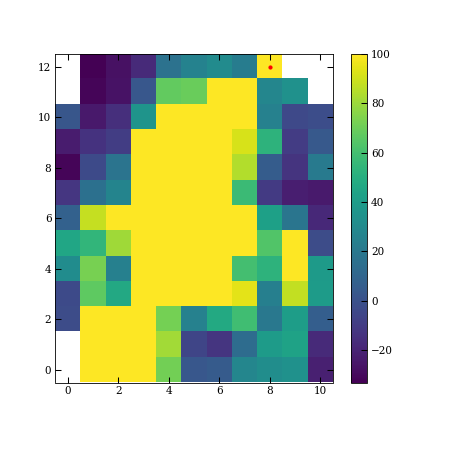

<IPython.core.display.Javascript object>


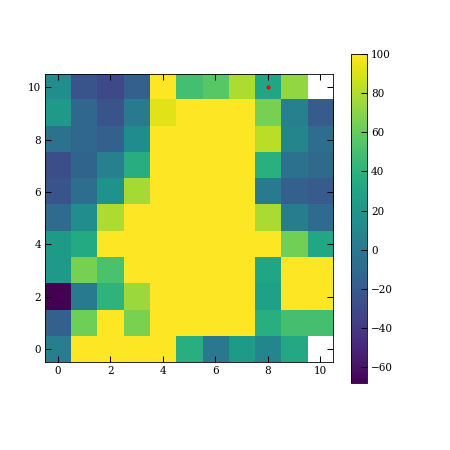

In [58]:
plt.figure()
plt.imshow(tpf1.flux[0],origin='lower',vmax = 100)
plt.colorbar()
plt.plot(ev_1[1],ev_1[0],'r.')

plt.figure()
plt.imshow(tpf2.flux[0],origin='lower',vmax = 100)
plt.plot(ev_2[1],ev_2[0],'r.')
plt.colorbar();

Looks like the masks are the same orientation.

In [70]:
print(ra_1[12,8] - ra_2[10,8])
print(dec_1[12,8] - dec_2[10,8])

0.0012153043791442997
0.00038412474695803667


yep

## Masks

In [73]:
tpf1_mask = np.zeros(tpf1.flux[0].shape)
tpf1_mask[11:14,3:10] = 1

tpf2_mask = np.zeros(tpf2.flux[0].shape)
tpf2_mask[9:11,3:10] = 1

lc_1 = np.nansum(tpf1.flux*tpf1_mask,axis=(1,2))
lc_2 = np.nansum(tpf2.flux*tpf2_mask,axis=(1,2))

<IPython.core.display.Javascript object>


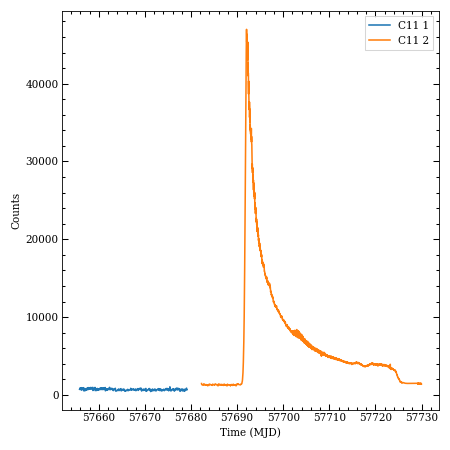

In [81]:
plt.figure()
plt.plot(tpf1.astropy_time.mjd, lc_1, label = 'C11 1')
plt.plot(tpf2.astropy_time.mjd, lc_2, label = 'C11 2')
plt.legend()

plt.xlabel('Time (MJD)')
plt.ylabel('Counts')

plt.tight_layout()
plt.minorticks_on()

0.0005715301386611557


<IPython.core.display.Javascript object>


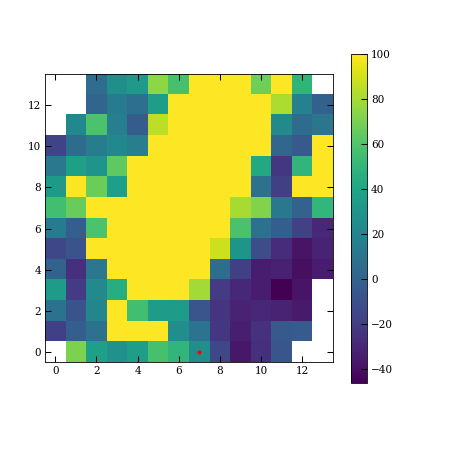

In [86]:
c2 = '/Users/ryanr/Documents/PhD/coding/Kepler/Data/ktwo203830112-c02_lpd-targ.fits.gz'
tpfc2 = lk.KeplerTargetPixelFile(c2)

ra_c2 = tpfc2.get_coordinates(cadence=0)[0]
dec_c2 = tpfc2.get_coordinates(cadence=0)[1]

dist_c2 = np.sqrt((ra_c2-ra)**2 + (dec_c2-dec)**2)
ev_c2 = np.where(dist_c2 == np.nanmin(dist_c2))
print(np.nanmin(dist_c2))

plt.figure()
plt.imshow(tpfc2.flux[0],origin='lower',vmax = 100)
plt.colorbar()
plt.plot(ev_c2[1],ev_c2[0],'r.')

In [89]:
tpfc2_mask = np.zeros(tpfc2.flux[0].shape)
tpfc2_mask[0:2,6:9] = 1

lc_c2 = np.nansum(tpfc2.flux*tpfc2_mask,axis=(1,2))

<IPython.core.display.Javascript object>


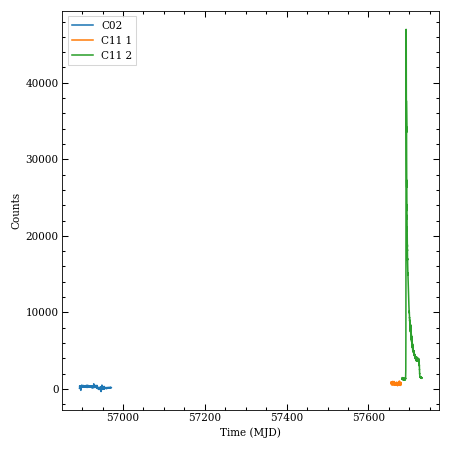

In [96]:
plt.figure()
plt.plot(tpfc2.astropy_time.mjd, lc_c2, label = 'C02')

plt.plot(tpf1.astropy_time.mjd, lc_1, label = 'C11 1')
plt.plot(tpf2.astropy_time.mjd, lc_2, label = 'C11 2')
plt.legend()

plt.xlabel('Time (MJD)')
plt.ylabel('Counts')

plt.tight_layout()
plt.minorticks_on()